# Task 4:Hand Gesture Recognition for Intuitive Human-Computer Interaction

Model Accuracy: 0.15

Classification Report:
               precision    recall  f1-score   support

  swipe_left       0.27      0.20      0.23        20
 swipe_right       0.25      0.21      0.23        24
     zoom_in       0.05      0.04      0.05        24
    zoom_out       0.04      0.06      0.05        16
        fist       0.06      0.06      0.06        16
        palm       0.25      0.45      0.32        11
    thumb_up       0.14      0.18      0.16        17
  thumb_down       0.18      0.09      0.12        22

    accuracy                           0.15       150
   macro avg       0.15      0.16      0.15       150
weighted avg       0.15      0.15      0.14       150



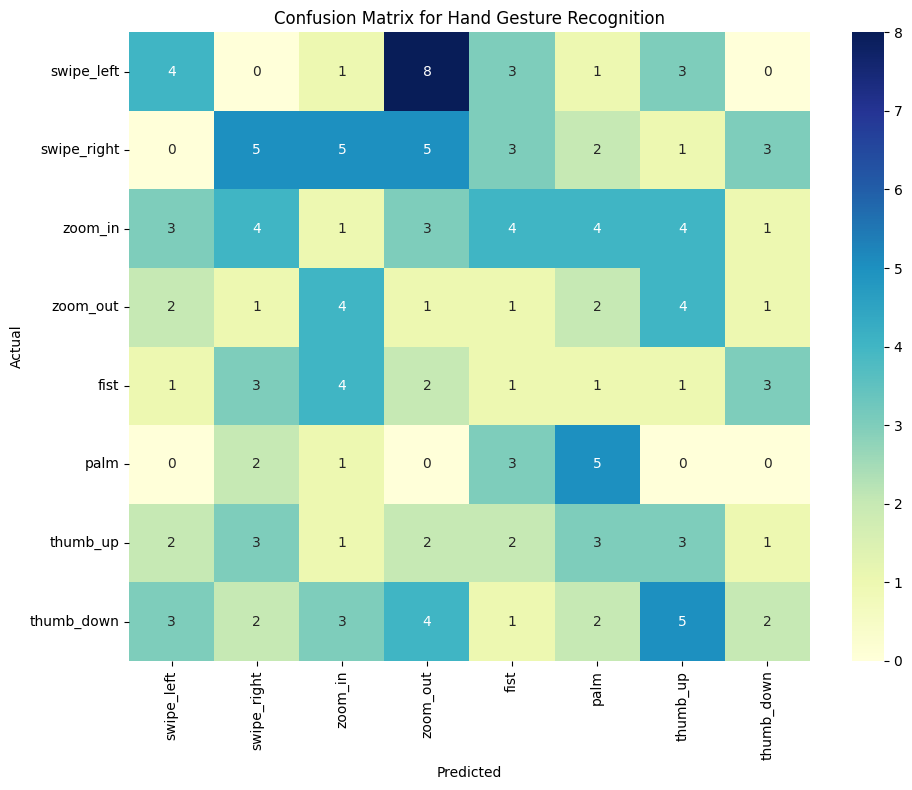

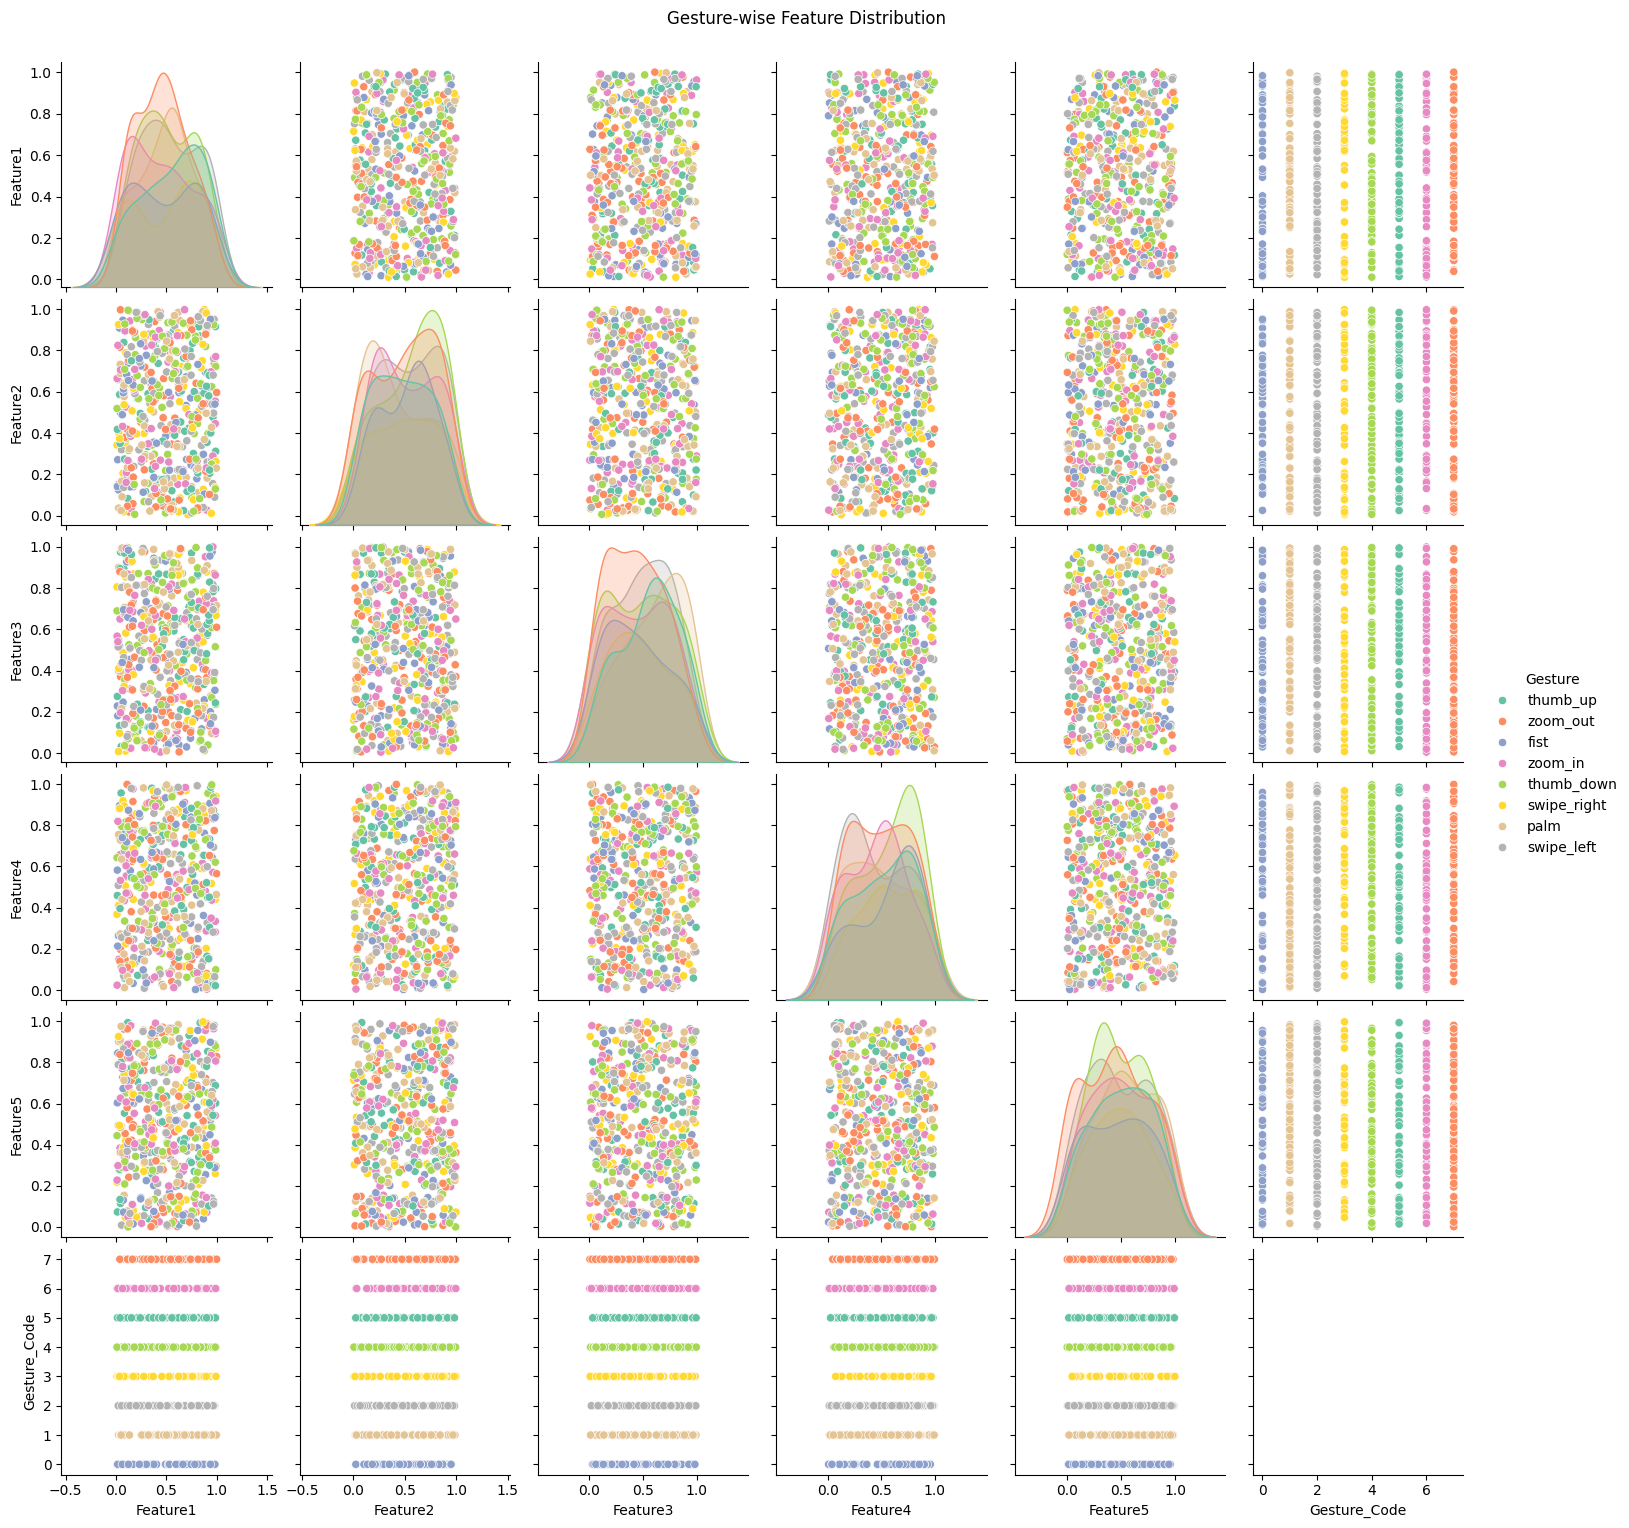

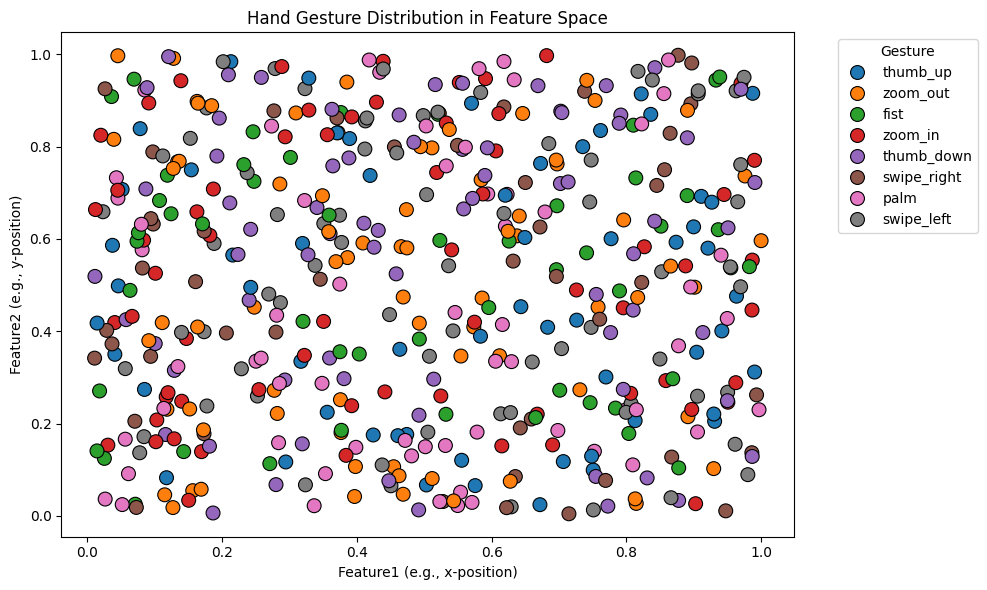

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Synthetic Hand Gesture Data
np.random.seed(42)
gesture_labels = ['swipe_left', 'swipe_right', 'zoom_in', 'zoom_out',
                  'fist', 'palm', 'thumb_up', 'thumb_down']

# Simulate Gesture Dataset
data = {
    'Gesture': np.random.choice(gesture_labels, 500),
    'Feature1': np.random.rand(500),
    'Feature2': np.random.rand(500),
    'Feature3': np.random.rand(500),
    'Feature4': np.random.rand(500),
    'Feature5': np.random.rand(500)
}
df = pd.DataFrame(data)

# Encode Gesture Labels
df['Gesture_Code'] = df['Gesture'].astype('category').cat.codes
gesture_mapping = dict(enumerate(df['Gesture'].astype('category').cat.categories))

# Define Features & Target
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']]
y = df['Gesture_Code']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train Support Vector Machine Classifier
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=gesture_labels))

# Confusion Matrix
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=gesture_labels, yticklabels=gesture_labels)
plt.title('Confusion Matrix for Hand Gesture Recognition')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Distribution by Gesture
sns.pairplot(df, hue='Gesture', palette='Set2', diag_kind='kde')
plt.suptitle('Gesture-wise Feature Distribution', y=1.02)
plt.show()

# 2D Feature Space Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Gesture',
                palette='tab10', edgecolor='k', s=100)
plt.title('Hand Gesture Distribution in Feature Space')
plt.xlabel('Feature1 (e.g., x-position)')
plt.ylabel('Feature2 (e.g., y-position)')
plt.legend(title='Gesture', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
